In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.simplefilter(action='ignore', category=Warning)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlx-2-0-regression/sample_submission.csv
/kaggle/input/mlx-2-0-regression/train.csv
/kaggle/input/mlx-2-0-regression/test.csv


# Loading the Data

In [5]:
df = pd.read_csv("/kaggle/input/mlx-2-0-regression/train.csv")
test = pd.read_csv("/kaggle/input/mlx-2-0-regression/test.csv")

In [3]:
df.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
0,76339,0.482850,1.169231,80.018,0.0201,Country Stuff (feat. Jake Owen),1.0,0.789,154586.0,NaN,...,4.0,161853.0,7.0,4.0,NaN,0.607,7.0,0.7250,0.000000,74
1,80006,0.267862,1.321321,147.966,0.3340,Solitude,6.0,0.715,46874.0,15.0,...,4.0,155619.0,1.0,4.0,0.843,0.783,4.0,NaN,0.043200,2
2,83501,0.242606,1.285319,142.980,0.1110,BDFFRNT (Saved from Conformity),4.0,NaN,264665.0,7.0,...,4.0,209378.0,6.0,4.0,NaN,0.211,10.0,0.6020,0.000000,35
3,81530,0.426400,1.279435,123.063,0.1960,Headlights (feat. Ilsey),5.0,0.685,209208.0,5.0,...,4.0,219043.0,11.0,4.0,0.702,0.369,NaN,0.8200,0.000335,70
4,60534,0.000000,0.974906,132.722,0.0811,Afraid,6.0,0.856,215346.0,5.0,...,4.0,258893.0,1.0,0.0,0.000,0.631,1.0,0.0221,0.000000,78


In [4]:
test.head()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,composition_label_0,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,...,emotional_resonance_2,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0
0,25174,0.600480,1.543590,124.008,0.0729,Dr.Q,1.0,0.763,23032.0,4.0,...,0.834,4.0,253987.0,4.0,4.0,0.604,0.2050,0.0,0.720,0.165000
1,38453,NaN,0.722420,129.942,0.0105,Start A Party,11.0,0.801,215466.0,20.0,...,0.216,4.0,267626.0,5.0,4.0,0.881,0.2610,1.0,0.496,0.000000
2,29013,0.461916,0.757962,83.000,0.2700,Sombras - Live,2.0,0.561,252261.0,44.0,...,0.546,4.0,226626.0,0.0,4.0,0.555,0.0555,0.0,0.846,0.002760
3,57463,0.144236,0.923977,183.991,0.1210,Tennis Court,2.0,NaN,198907.0,23.0,...,0.337,4.0,234286.0,0.0,4.0,0.674,0.4040,7.0,0.428,0.000194
4,51264,0.629832,1.473795,201.277,0.0610,La Cumbia Del Lazo,10.0,0.716,158720.0,NaN,...,0.966,4.0,188520.0,8.0,4.0,0.511,0.9620,10.0,0.652,0.000115


# EDA

## Dataset Overview

In [5]:
df.shape

(61609, 62)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61609 entries, 0 to 61608
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          61609 non-null  int64  
 1   emotional_charge_2          59167 non-null  float64
 2   groove_efficiency_1         61429 non-null  float64
 3   beat_frequency_1            61223 non-null  float64
 4   organic_texture_2           61226 non-null  float64
 5   composition_label_0         58660 non-null  object 
 6   harmonic_scale_1            58304 non-null  float64
 7   intensity_index_0           55638 non-null  float64
 8   duration_ms_0               60320 non-null  float64
 9   album_name_length           52015 non-null  float64
 10  beat_frequency_0            51878 non-null  float64
 11  beat_frequency_2            59843 non-null  float64
 12  artist_count                58348 non-null  float64
 13  composition_label_1         601

In [7]:
df.describe()

,id,emotional_charge_2,groove_efficiency_1,beat_frequency_1,organic_texture_2,harmonic_scale_1,intensity_index_0,duration_ms_0,album_name_length,beat_frequency_0,...,time_signature_0,duration_ms_1,harmonic_scale_0,time_signature_2,rhythmic_cohesion_2,emotional_resonance_0,harmonic_scale_2,intensity_index_2,instrumental_density_0,target
count,61609.000000,59167.000000,61429.000000,61223.000000,61226.000000,58304.000000,55638.000000,6.032000e+04,52015.000000,51878.000000,...,59704.000000,5.250400e+04,53925.000000,58455.000000,56049.000000,60063.000000,57142.000000,60916.000000,60900.000000,61609.000000
mean,51390.780162,0.316976,1.238856,121.022910,0.274748,5.192594,0.604426,2.011315e+05,18.225723,119.133973,...,3.874849,2.110477e+05,5.212499,3.901274,0.612252,0.458851,5.288894,0.616045,0.148391,52.067328
std,29659.344472,0.212777,6.171617,30.467061,0.303020,3.629153,0.243943,1.100738e+05,14.404713,32.067971,...,0.564558,8.911099e+04,3.571288,0.465295,0.179591,0.261196,3.567118,0.230109,0.306915,21.569248
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.485000e+03,1.000000,0.000000,...,0.000000,4.120000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25832.000000,0.143877,0.730914,96.138000,0.027125,2.000000,0.447000,1.482340e+05,9.000000,94.802250,...,4.000000,1.682000e+05,2.000000,4.000000,0.506000,0.243000,2.000000,0.477000,0.000000,37.000000
50%,51410.000000,0.291060,1.004894,120.012000,0.141000,5.000000,0.633000,1.959215e+05,14.000000,119.893000,...,4.000000,2.029730e+05,5.000000,4.000000,0.630000,0.449000,5.000000,0.646000,0.000019,57.000000
75%,77069.000000,0.466860,1.358251,141.401000,0.454000,8.000000,0.803000,2.402488e+05,23.000000,140.023000,...,4.000000,2.413605e+05,8.000000,4.000000,0.745000,0.663000,8.000000,0.791000,0.024600,69.000000
max,102681.000000,0.976063,654.000000,239.983000,0.996000,11.000000,1.000000,3.664274e+06,199.000000,235.998000,...,5.000000,3.550973e+06,11.000000,5.000000,0.979000,1.000000,11.000000,1.000000,1.000000,100.000000


## Missing Values

In [8]:
df.isnull().sum()

id                           0
emotional_charge_2        2442
groove_efficiency_1        180
beat_frequency_1           386
organic_texture_2          383
                          ... 
emotional_resonance_0     1546
harmonic_scale_2          4467
intensity_index_2          693
instrumental_density_0     709
target                       0
Length: 62, dtype: int64

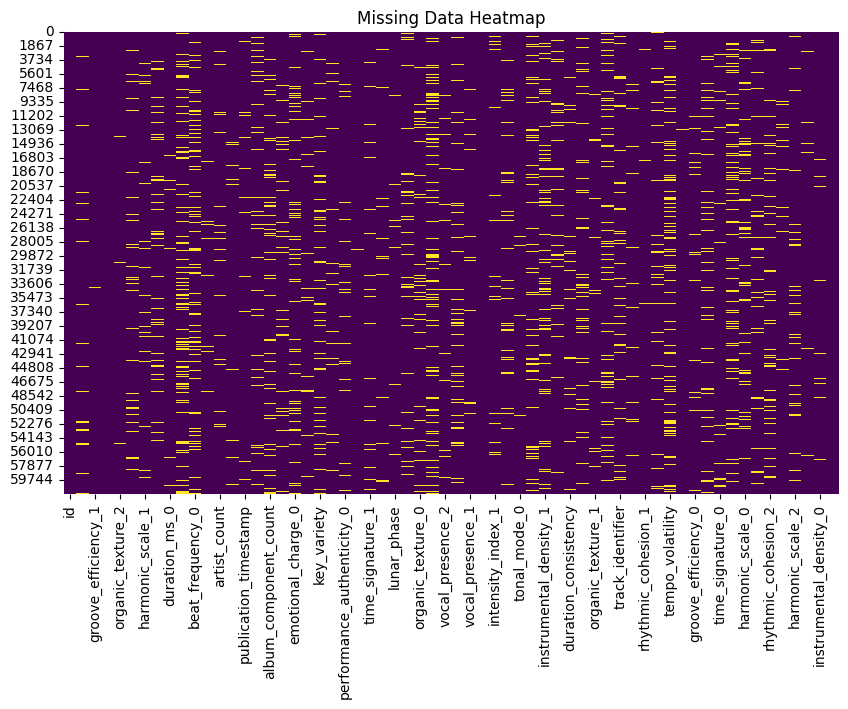

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handling Missing Values

In [6]:
numerical_cols = list(df.select_dtypes(include=["float64", "int64"]).columns)
categorical_cols = list(df.select_dtypes(include=["object"]).columns)
numerical_cols.remove("target")

In [7]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

test[numerical_cols] = test[numerical_cols].fillna(df[numerical_cols].mean())
test[categorical_cols] = test[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [12]:
df.isnull().sum()

id                        0
emotional_charge_2        0
groove_efficiency_1       0
beat_frequency_1          0
organic_texture_2         0
                         ..
emotional_resonance_0     0
harmonic_scale_2          0
intensity_index_2         0
instrumental_density_0    0
target                    0
Length: 62, dtype: int64

# Encoding Categorical Features

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
test[categorical_cols] = encoder.transform(test[categorical_cols])

# Splitting Data

In [10]:
X = df.drop(columns=["target", "id"])
y = df["target"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(test.drop(columns=["id"]))

# Model Training

In [12]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [13]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4603, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0468, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1.7817, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2200, n_jobs=None, nthread=-1,
             num_parallel_tree=None, ...)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train, y_train)

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train, y_train)

# Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score
import numpy as np

def adjusted_r2(r2, n, p):
    """Computes Adjusted R-squared."""
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

def predict_regression(train_X, train_y, val_X, val_y, model):
    """Trains and evaluates a regression model."""
    model.fit(train_X, train_y)
    pred_y = model.predict(val_X)

    # Evaluation Metrics
    mae = mean_absolute_error(val_y, pred_y)
    mse = mean_squared_error(val_y, pred_y)
    rmse = mean_squared_error(val_y, pred_y, squared=False)
    r2 = r2_score(val_y, pred_y)
    adj_r2 = adjusted_r2(r2, len(val_y), val_X.shape[1])
    mape = mean_absolute_percentage_error(val_y, pred_y)
    evs = explained_variance_score(val_y, pred_y)

    # Print Metrics
    print("\nMean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared Score:", r2)
    print("Adjusted R-squared Score:", adj_r2)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("Explained Variance Score:", evs)

    # Scatter Plot for Predictions
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=val_y, y=pred_y, alpha=0.7)
    plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], '--r')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Regression Prediction Scatter Plot')
    plt.show()



Training Gradient Boosting...

Mean Absolute Error: 8.281333294327624
Mean Squared Error: 154.36335505153608
Root Mean Squared Error (RMSE): 12.424305012818063
R-squared Score: 0.6685677975376761
Adjusted R-squared Score: 0.6669459125244033
Mean Absolute Percentage Error (MAPE): 0.7276627742179401
Explained Variance Score: 0.6723628468987015


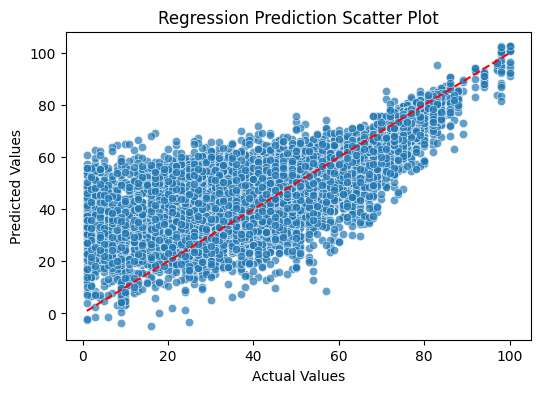


Training Random Forest...

Mean Absolute Error: 6.623824054536602
Mean Squared Error: 125.69273257588056
Root Mean Squared Error (RMSE): 11.21127702698852
R-squared Score: 0.7301262389818897
Adjusted R-squared Score: 0.728805594200788
Mean Absolute Percentage Error (MAPE): 0.6985108235276021
Explained Variance Score: 0.734140888956784


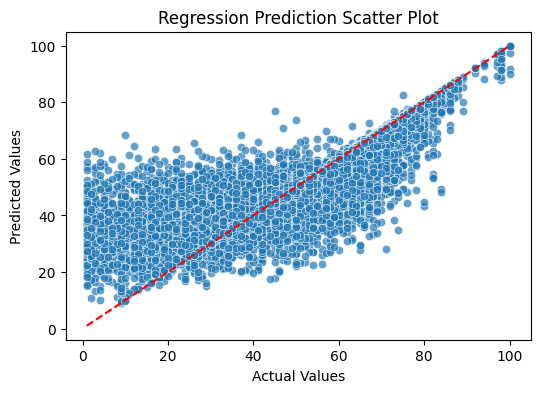


Training XGBoost...

Mean Absolute Error: 9.814168730019802
Mean Squared Error: 179.00246136777426
Root Mean Squared Error (RMSE): 13.37918014557597
R-squared Score: 0.6156653889940955
Adjusted R-squared Score: 0.6137846226079644
Mean Absolute Percentage Error (MAPE): 0.7656177983775235
Explained Variance Score: 0.615727912144492


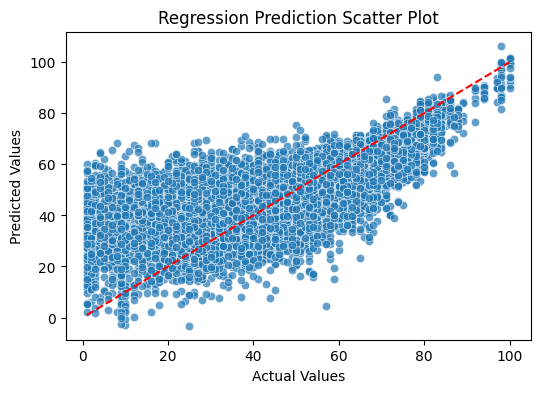


Training Enet...

Mean Absolute Error: 15.774065843315881
Mean Squared Error: 380.831918036854
Root Mean Squared Error (RMSE): 19.514915271065206
R-squared Score: 0.18231913707261915
Adjusted R-squared Score: 0.17831776265163868
Mean Absolute Percentage Error (MAPE): 1.1023252546280553
Explained Variance Score: 0.1823326994769363


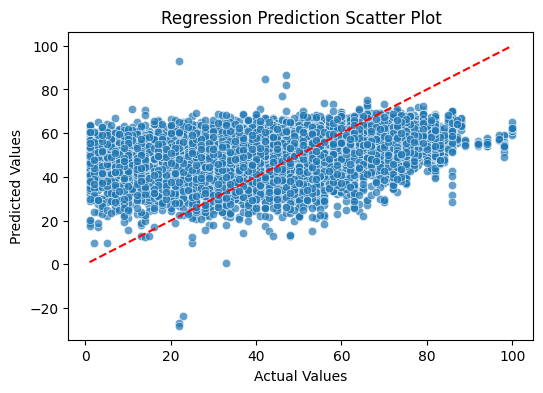

In [24]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor



regressors = {
    "Gradient Boosting": GBoost,
    "Random Forest": random_forest,
    "XGBoost" : model_xgb,
    "Enet": ENet,
    "LGB": model_lgb
}

for name, model in regressors.items():
    print(f"\nTraining {name}...")
    predict_regression(X_train, y_train, X_val, y_val, model)


In [ ]:
# y_pred = model.predict(X_val)
# rmse = np.sqrt(mean_squared_error(y_val, y_pred))
# print("Root Mean Squared Error:", rmse)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

def k_fold_cv(X, y, model, n_splits=5):
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    rmse_scores = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)

        model.fit(X_train_scaled, y_train)

        y_pred = model.predict(X_val_scaled)

        rmse = mean_squared_error(y_val, y_pred, squared=False)
        rmse_scores.append(rmse)
    
    print(f"\nAverage RMSE over {n_splits} folds: {sum(rmse_scores) / n_splits:.4f}")
    return rmse_scores

rmse_results = k_fold_cv(X, y, random_forest)
print("RMSE Scores for each fold:", rmse_results)


# Stacking

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Number of folds
n_folds = 5

def rmse_cv(model, X, y):
    """
    Performs cross-validation and computes RMSE.

    Parameters:
    - model: Regression model to validate
    - X: Feature DataFrame
    - y: Target variable

    Returns:
    - Array of RMSE scores from cross-validation
    """
    kf = KFold(n_folds, shuffle=True, random_state=42)
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    
    return rmse_scores

In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [36]:
averaged_models = AveragingModels(models = (ENet, GBoost, random_forest))
rmse_cv(averaged_models, X_train, y_train)

array([13.24074278, 13.37997196, 13.41022097, 13.50728838, 13.58175259])


Mean Absolute Error: 9.712818196948042
Mean Squared Error: 174.53393026180623
Root Mean Squared Error (RMSE): 13.211129030548685
R-squared Score: 0.625259732844214
Adjusted R-squared Score: 0.6234259170029819
Mean Absolute Percentage Error (MAPE): 0.829662814193856
Explained Variance Score: 0.6270986546440319


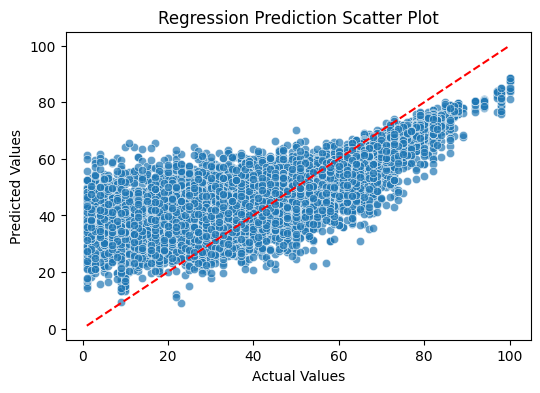

In [48]:
predict_regression(X_train, y_train, X_val, y_val, averaged_models)

# Predictions on Test Set

In [45]:
test_predictions = averaged_models.fit(X_train, y_train).predict(X_test)
test["target"] = test_predictions
submission = test[["id", "target"]]

In [46]:
submission.head()

,id,target
0,25174,55.850303
1,38453,63.215562
2,29013,62.999103
3,57463,55.749156
4,51264,40.828051


In [47]:
submission.to_csv("submission.csv", index=False)
print("Predictions saved to submission.csv")

Predictions saved to submission.csv
